In [1]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Download SPY data
ticker_symbol = "SPY"
start_date = "2013-01-01"
end_date = "2023-12-31"
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting features and target variable
data = spy_data[['Open', 'High', 'Low', 'Close', 'Volume']]
data['Days'] = (data.index - data.index[0]).days.values

In [4]:
# Split the data into features (X) and target variable (y)
X = data[['Days', 'Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# Feature scaling for input features only
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [7]:
# Reshape data for the input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a simple RNN model with LSTM cells
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test_reshaped)

Epoch 1/20
156/156 - 2s - loss: 55888.6797 - 2s/epoch - 10ms/step
Epoch 2/20
156/156 - 0s - loss: 1022.4644 - 330ms/epoch - 2ms/step
Epoch 3/20
156/156 - 0s - loss: 275.5610 - 352ms/epoch - 2ms/step
Epoch 4/20
156/156 - 0s - loss: 203.9775 - 363ms/epoch - 2ms/step
Epoch 5/20
156/156 - 0s - loss: 173.7352 - 335ms/epoch - 2ms/step
Epoch 6/20
156/156 - 0s - loss: 143.4892 - 352ms/epoch - 2ms/step
Epoch 7/20
156/156 - 0s - loss: 119.3275 - 348ms/epoch - 2ms/step
Epoch 8/20
156/156 - 0s - loss: 94.0056 - 335ms/epoch - 2ms/step
Epoch 9/20
156/156 - 0s - loss: 65.3721 - 334ms/epoch - 2ms/step
Epoch 10/20
156/156 - 0s - loss: 47.4972 - 367ms/epoch - 2ms/step
Epoch 11/20
156/156 - 0s - loss: 34.9495 - 332ms/epoch - 2ms/step
Epoch 12/20
156/156 - 0s - loss: 22.4109 - 335ms/epoch - 2ms/step
Epoch 13/20
156/156 - 0s - loss: 17.8864 - 351ms/epoch - 2ms/step
Epoch 14/20
156/156 - 0s - loss: 16.4728 - 332ms/epoch - 2ms/step
Epoch 15/20
156/156 - 0s - loss: 14.3840 - 349ms/epoch - 2ms/step
Epoch 16/20

In [8]:
# Evaluate the model without scaling predictions
mae_LSTM = mean_absolute_error(y_test, y_pred)
mse_LSTM = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae_LSTM}")
print(f"Mean Squared Error: {mse_LSTM}")

Mean Absolute Error: 2.7961870875169224
Mean Squared Error: 12.090323317379083


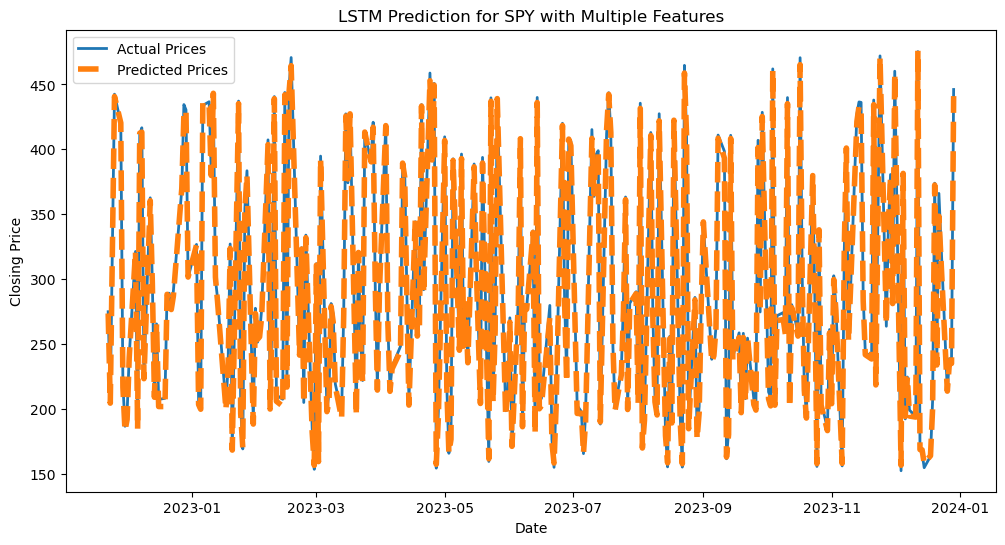

In [9]:
# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=4)
plt.title('LSTM Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()